##**EDA on Image Data**

In [ ]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nusrathos
Your Kaggle Key: ··········


100%|██████████| 28.0M/28.0M [00:00<00:00, 60.1MB/s]


In [ ]:
from PIL import Image
from numpy import array
sample_image = Image.open('/content/alzheimer-mri-dataset/Dataset/Mild_Demented/mild.jpg')
ar = array(sample_image)
ar

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
print(ar.shape)

(128, 128)


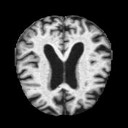

In [ ]:
sample_image

## **EDA on Numerical Data**

In [ ]:
import pandas as pd
import numpy as np
# import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('dementia_dataset.csv')

In [ ]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
len(df[df["Group"]=="Converted"])

37

In [ ]:
df.nunique()

Subject ID    150
MRI ID        373
Group           3
Visit           5
MR Delay      201
M/F             2
Hand            1
Age            39
EDUC           12
SES             5
MMSE           18
CDR             4
eTIV          286
nWBV          136
ASF           265
dtype: int64

In [ ]:
df =df.drop(['Hand'],axis=1)
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
df.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [ ]:
mean = df['SES'].mean()
median = df['SES'].median()
mode = df['SES'].mode()
print("mean:%s, median:%s, mode:%s" % (mean, median, mode))

mean:2.4604519774011298, median:2.0, mode:0    2.0
Name: SES, dtype: float64


median is closer to mean than mode, so use median for missing value imputation. cannot use mean because the feature uses integer values, not float, and using mean gives us float

In [ ]:
mean = df['MMSE'].mean()
median = df['MMSE'].median()
mode = df['MMSE'].mode()
print("mean:%s, median:%s, mode:%s" % (mean, median, mode))

mean:27.342318059299192, median:29.0, mode:0    30.0
Name: MMSE, dtype: float64


median is closer to mean than mode, so use median for missing value imputation. cannot use mean because the feature uses integer values, not float, and using mean gives us float

In [ ]:
df['SES'].fillna((df['SES'].median()), inplace=True)
df['MMSE'].fillna((df['MMSE'].median()), inplace=True)

In [ ]:
df.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.0,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


<ipython-input-27-984c0d86f16b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


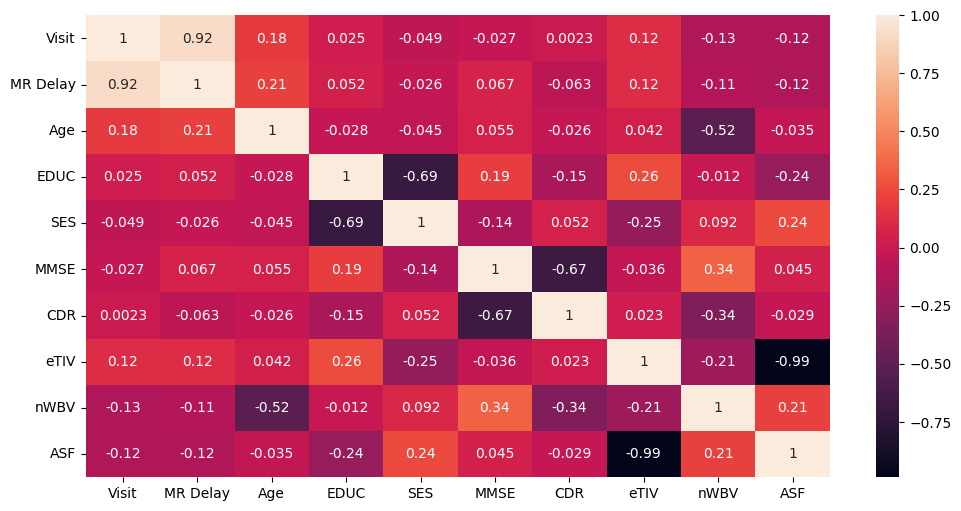

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

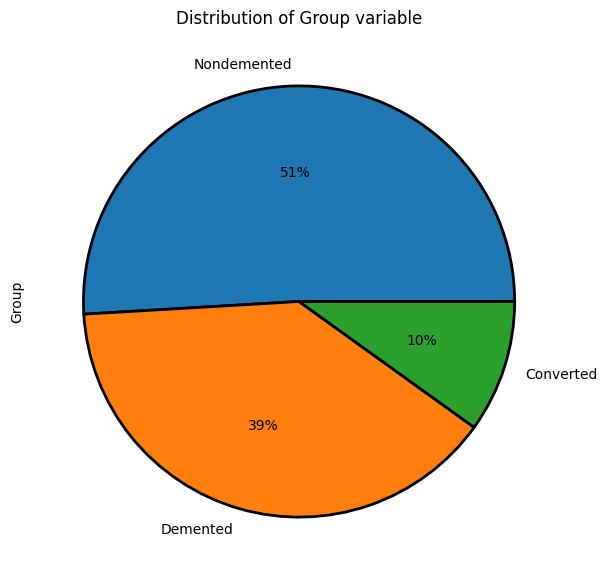

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot()
label_list = df['Group'].unique().tolist()
df['Group'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("tab10"),labels=label_list,
                                     wedgeprops={"linewidth":2,"edgecolor":"k"})
plt.title("Distribution of Group variable")
plt.show()

In [ ]:
df.groupby(["Group", "CDR"]).size()

Group        CDR
Converted    0.0     18
             0.5     19
Demented     0.5    102
             1.0     41
             2.0      3
Nondemented  0.0    188
             0.5      2
dtype: int64

In [ ]:
normal = (df['CDR']==0).sum()
demented = (df['CDR'] >= 0.5).sum()
print(normal, demented)

def sum_CDR(n):
  if n == 0:
    return 'Normal'
  else:
    return 'Demented'

df['CDR'] = df['CDR'].apply(lambda x: sum_CDR(x))

206 167


In [ ]:
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,87,14,2.0,27.0,Normal,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,88,14,2.0,30.0,Normal,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,75,12,2.0,23.0,Demented,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,76,12,2.0,28.0,Demented,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,80,12,2.0,22.0,Demented,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,82,16,1.0,28.0,Demented,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,86,16,1.0,26.0,Demented,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,61,13,2.0,30.0,Normal,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,63,13,2.0,30.0,Normal,1327,0.796,1.323


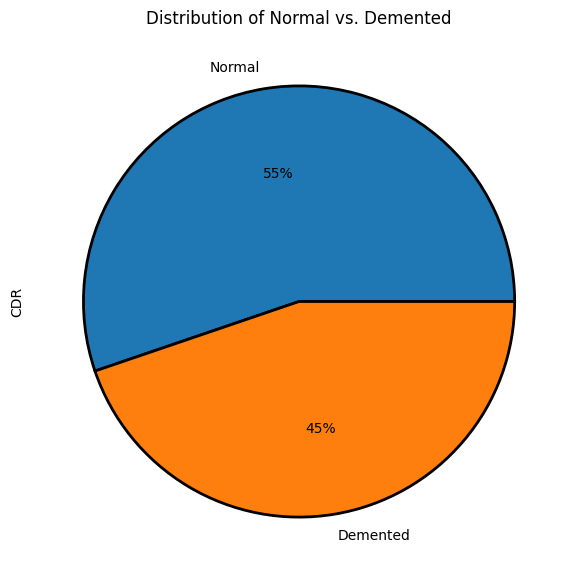

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot()
label_list = df['CDR'].unique().tolist()
df['CDR'].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("tab10"),labels=label_list,
                                     wedgeprops={"linewidth":2,"edgecolor":"k"})
plt.title("Distribution of Normal vs. Demented")
plt.show()

In [ ]:
df.loc[df['Group'] == 'Converted']

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,87,14,1.0,30.0,Normal,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,88,14,1.0,29.0,Normal,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,92,14,1.0,27.0,Demented,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,80,20,1.0,29.0,Normal,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,82,20,1.0,28.0,Demented,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,84,20,1.0,26.0,Demented,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,86,12,3.0,30.0,Normal,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,88,12,3.0,30.0,Normal,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,91,12,3.0,28.0,Demented,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,71,16,1.0,27.0,Normal,1289,0.771,1.362


<ipython-input-24-a8e5fc2183a9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(df[['EDUC']],hist=False)


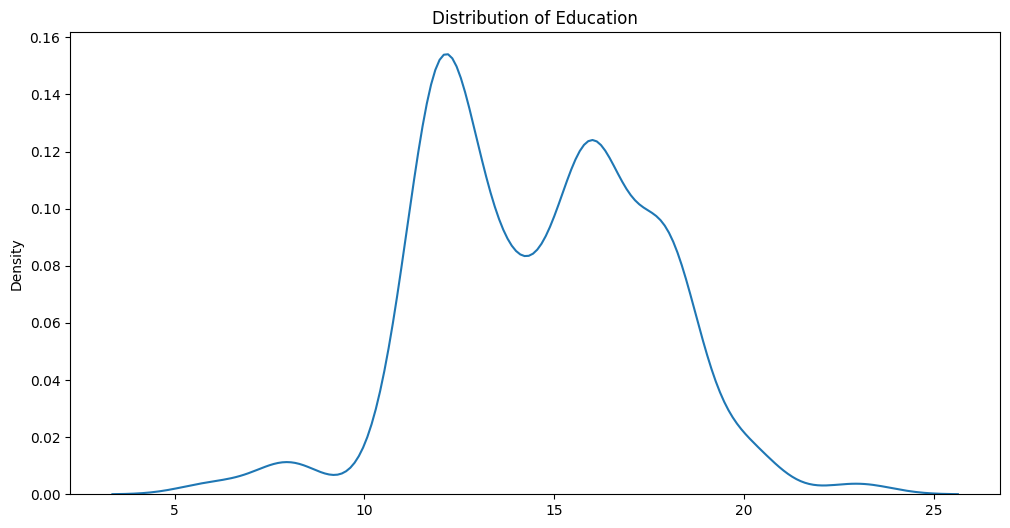

In [ ]:
fig = plt.figure(figsize=(12,6))
ax2=sns.distplot(df[['EDUC']],hist=False)
ax2.set_title('Distribution of Education')
plt.show()

<ipython-input-25-1e3d126b66a6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(df[['Age']],hist=False)


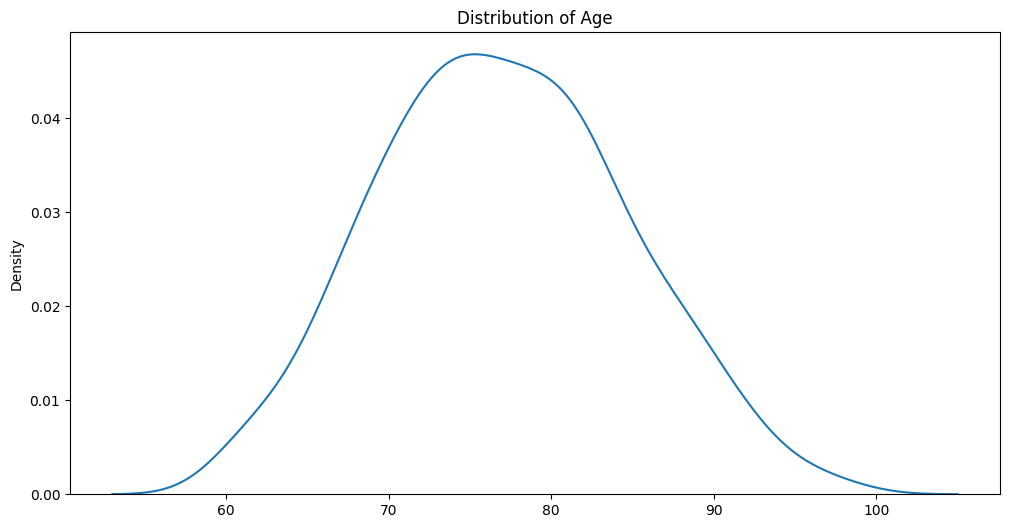

In [ ]:
fig = plt.figure(figsize=(12,6))
ax2=sns.distplot(df[['Age']],hist=False)
ax2.set_title('Distribution of Age')
plt.show()

<ipython-input-43-af64041151ad>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(df[['MMSE']],hist=False)


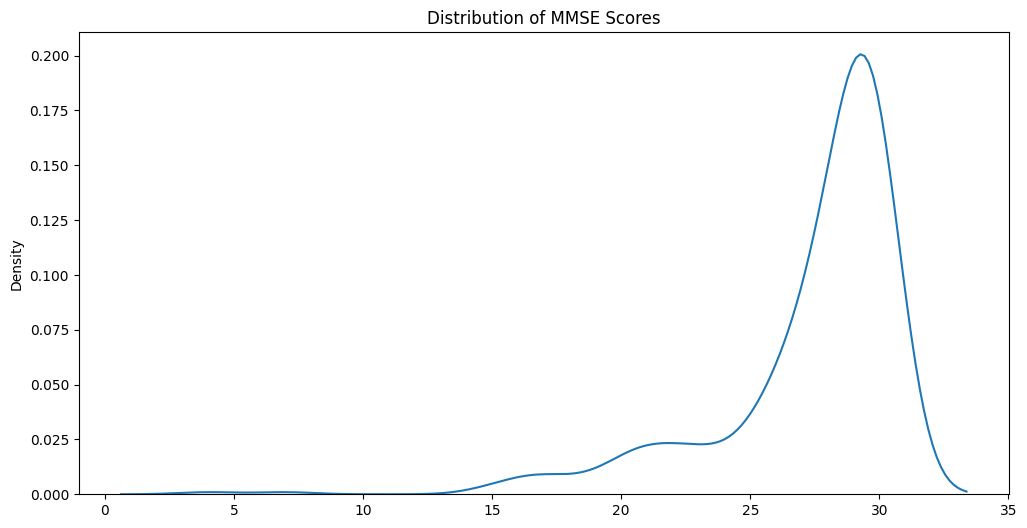

In [ ]:
fig = plt.figure(figsize=(12,6))
ax2=sns.distplot(df[['MMSE']],hist=False)
ax2.set_title('Distribution of MMSE Scores')
plt.show()

<ipython-input-18-93a79cf06d00>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax2=sns.distplot(df[['nWBV']],hist=False)


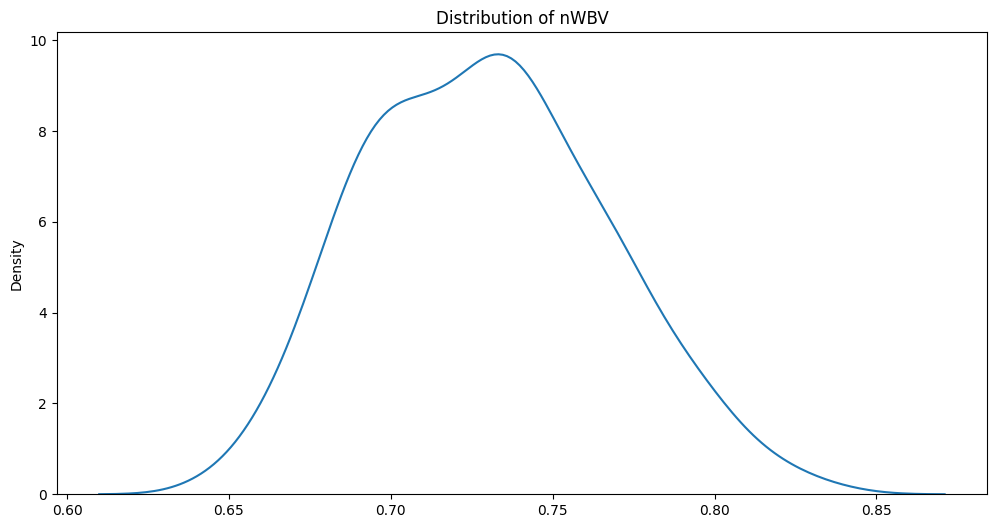

In [ ]:
fig = plt.figure(figsize=(12,6))
ax2=sns.distplot(df[['nWBV']],hist=False)
ax2.set_title('Distribution of nWBV')
plt.show()

<Axes: xlabel='CDR', ylabel='nWBV'>

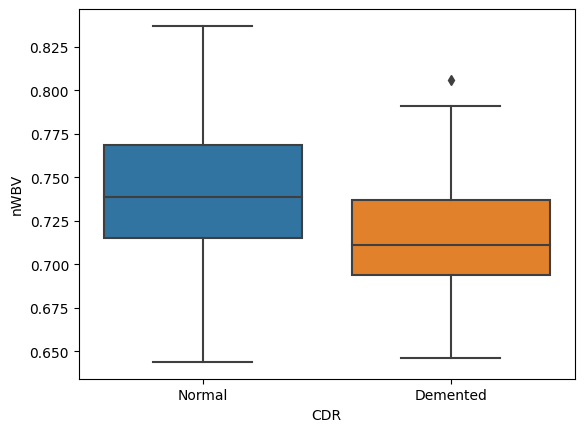

In [ ]:
sns.boxplot(x=df["CDR"], y=df["nWBV"] )

<Axes: xlabel='CDR', ylabel='EDUC'>

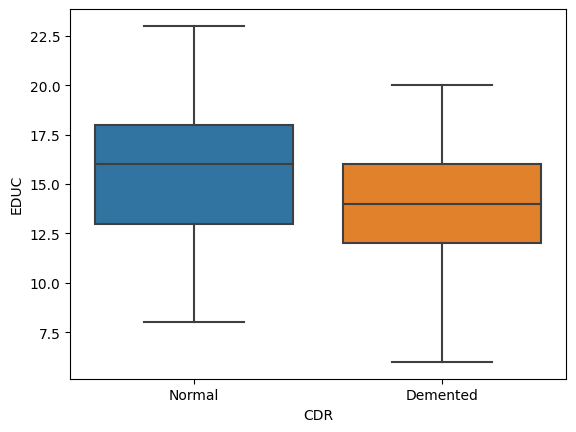

In [ ]:
sns.boxplot(x=df["CDR"], y=df["EDUC"] )

<Axes: xlabel='Group', ylabel='nWBV'>

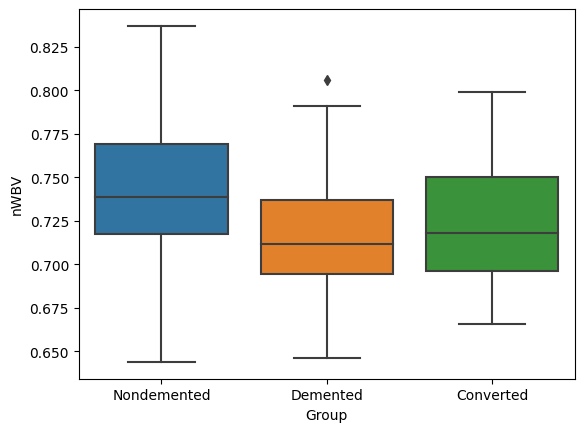

In [ ]:
sns.boxplot(x=df["Group"], y=df["nWBV"] )

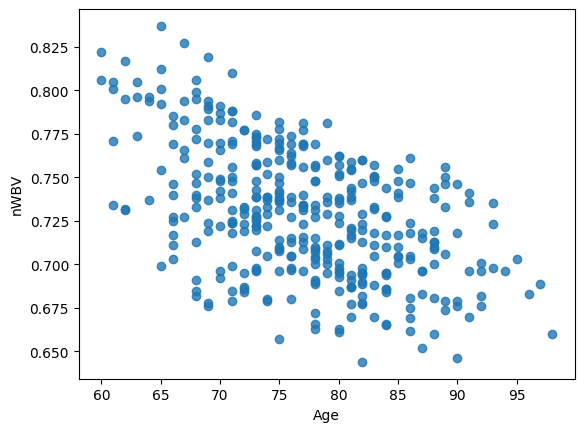

In [ ]:
sns.regplot(data = df, x = 'Age', y = 'nWBV', fit_reg = False)
plt.show()

<ipython-input-47-984c0d86f16b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


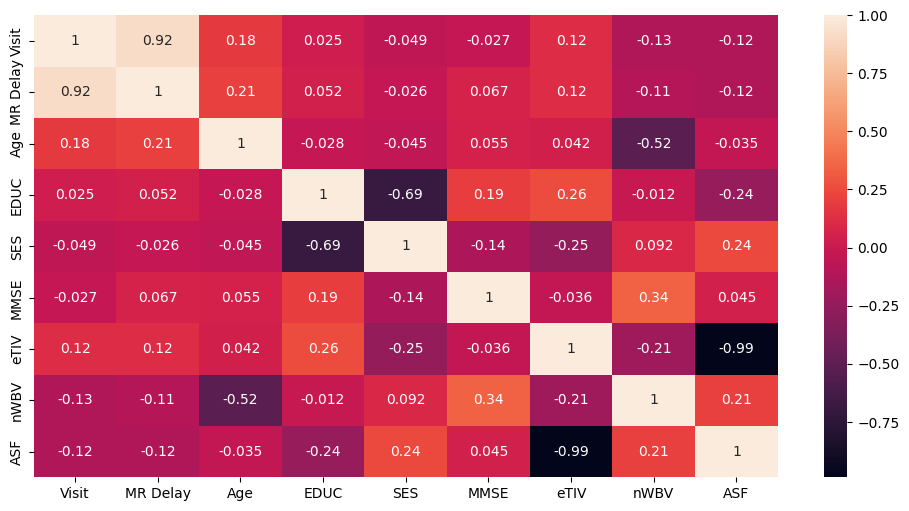

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
df =df.drop(['MR Delay'],axis=1)
df

,Subject ID,MRI ID,Group,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,M,87,14,2.0,27.0,Normal,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,M,88,14,2.0,30.0,Normal,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,M,75,12,2.0,23.0,Demented,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,M,76,12,2.0,28.0,Demented,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,M,80,12,2.0,22.0,Demented,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,M,82,16,1.0,28.0,Demented,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,M,86,16,1.0,26.0,Demented,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,F,61,13,2.0,30.0,Normal,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,F,63,13,2.0,30.0,Normal,1327,0.796,1.323
